In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from plotnine import *

In [4]:
train = pd.read_csv("data/titanic/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test = pd.read_csv("data/titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# 탐색적 분석방법 (EDA, Exploratory Data Analysis)

In [8]:
train.head()
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [9]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.groupby("Sex")["Survived"].mean()    # 성별에 따른 생존률

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
train.pivot_table(index="Sex",values="Survived", aggfunc=np.mean)    # 성별에 따른 생존률

,Survived
Sex,
female,0.742038
male,0.188908


In [14]:
train.pivot_table(index="Sex")    # 성별에 따른 각 변수의 평균
# 피봇테이블에서 default 집계함수는 average(mean)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [15]:
train.groupby("Sex")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [19]:
# 성별, 선실등급별 생존률 출력
train.pivot_table("Survived", index=["Sex", "Pclass"], aggfunc=np.mean)
train.groupby(["Sex", "Pclass"])[["Survived"]].mean()    # 대괄호를 두개 쳐주면 dataframe으로 출력

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

# 예측1

In [24]:
test["Survived"] = (test.Sex == "female") & (test.Age > 0) & (test.Embarked)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True


In [26]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

### Kaggle submission 연습

In [28]:
submission = test[["PassengerId", "Survived"]].copy()
submission

,PassengerId,Survived
0,892,False
1,893,True
2,894,False
3,895,False
4,896,True
5,897,False
6,898,True
7,899,False
8,900,True
9,901,False


In [30]:
submission["Survived"] = submission["Survived"].astype(int)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [31]:
submission.to_csv("submission.csv")    # 인덱스가 함께 저장된다

In [32]:
submission.to_csv("submission.csv", index=False)    # 인덱스는 빼고 저장된다

# 시각화

### missing value 시각화

In [33]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

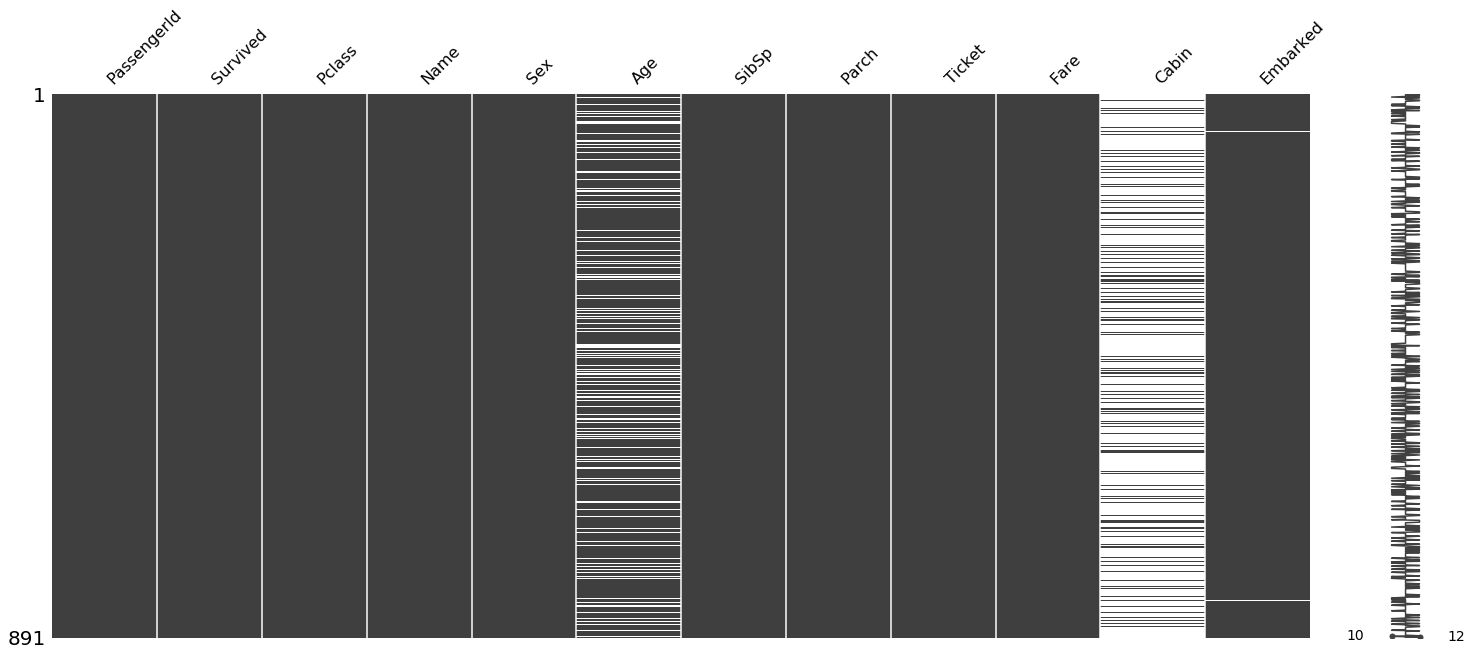

In [36]:
import missingno as msno    # missing data를 시각화하기에 편하다
msno.matrix(train)

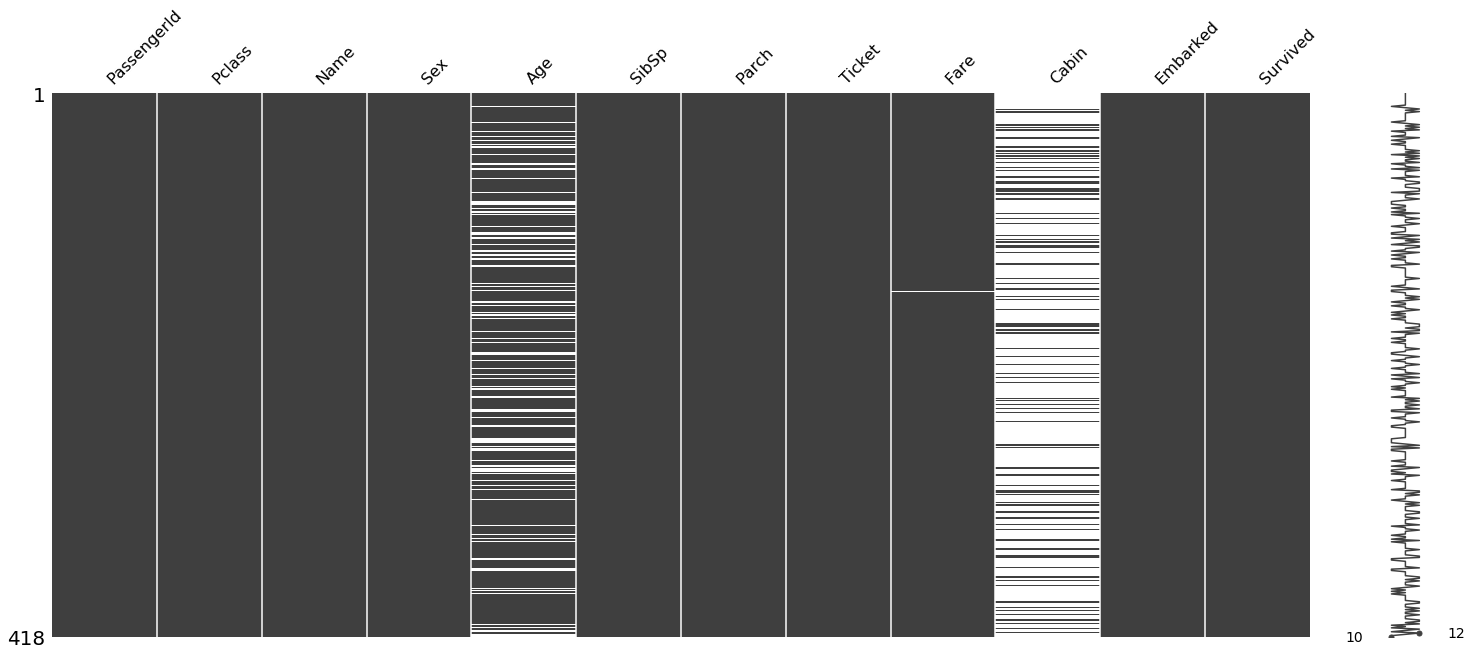

In [37]:
msno.matrix(test)

# ggplot

In [40]:
from plotnine import *

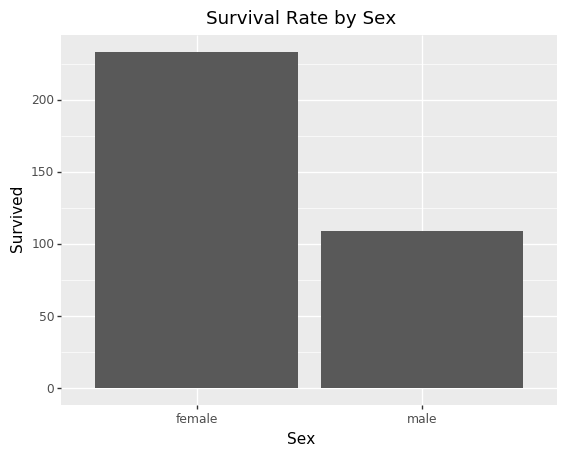

<ggplot: (164622040317)>

In [46]:
(ggplot(train)
+ aes(x="Sex", y="Survived")
+ geom_col()
+ ggtitle("Survival Rate by Sex")
+ theme(text=element_text(family="MalgunGothic")))

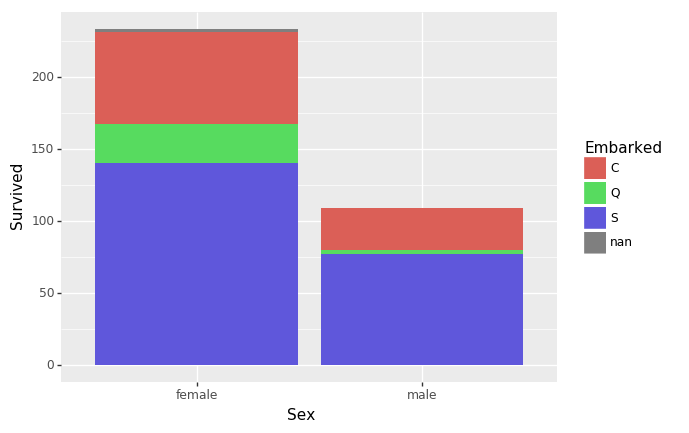

<ggplot: (164620785984)>

In [47]:
(ggplot(train)
+ aes(x="Sex", y="Survived", fill="Embarked")
+ geom_col()
)

In [48]:
# Pclass별로 데이터 건수 출력
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [50]:
train.info()    # Pclass는 int로 나온다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [51]:
# 정수 -> 문자
train["Pclass"] = train["Pclass"].astype("str")

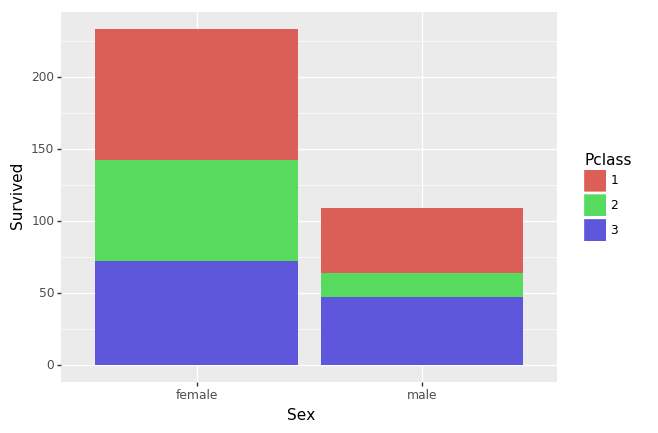

<ggplot: (164622102476)>

In [52]:
(ggplot(train)
+ aes(x="Sex", y="Survived", fill="Pclass")
+ geom_col()
)

* 위 시각화는 오해의 소지가 있다. 단순 count로 세었기 때문에 3등급도 많이 살아남은 것으로 보일지도 모르나, 사실은 3등급의 수가 절대적으로 많기 때문에 죽은 사람도 산 사람도 많을 뿐인 것이다.

In [54]:
train_drop_age = train["Age"].dropna()
train_drop_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


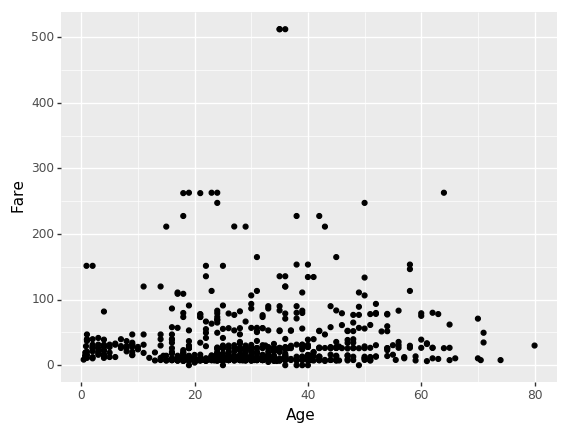

<ggplot: (164622326220)>

In [55]:
(
ggplot(train)
    +aes(x="Age", y="Fare")
    +geom_point()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


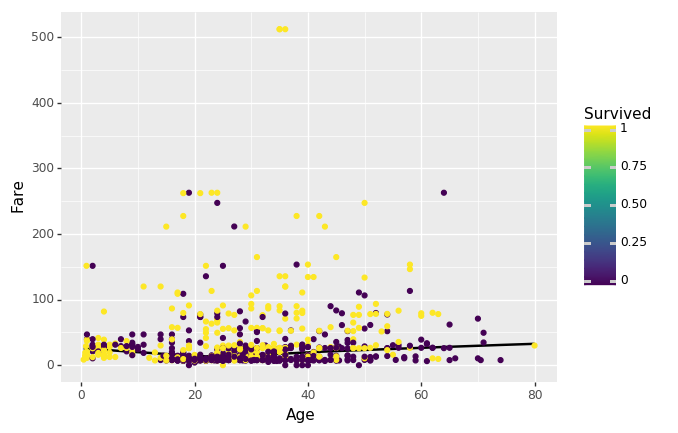

<ggplot: (-9223371872232356513)>

In [57]:
# 연령대(x)와 운임(y) 생존률
(
ggplot(train)
    +aes(x="Age", y="Fare", color="Survived")
    +stat_smooth()
    +geom_point()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


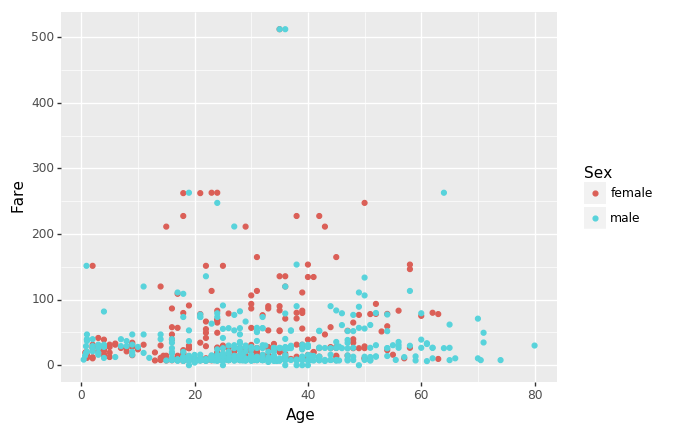

<ggplot: (164622897721)>

In [58]:
(
ggplot(train)
    +aes(x="Age", y="Fare", color="Sex")
    +geom_point()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


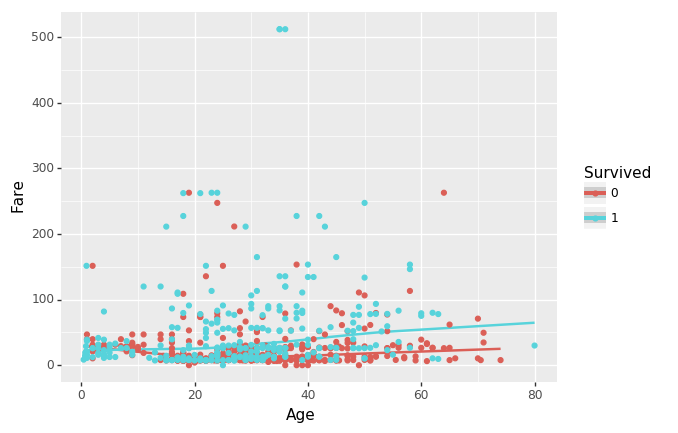

<ggplot: (-9223371872231878140)>

In [59]:
# 연령대(x)와 운임(y)

train["Survived"] = train["Survived"].astype("category")

(
ggplot(train)
    +aes(x="Age", y="Fare", color="Survived")
    +stat_smooth()
    +geom_point()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


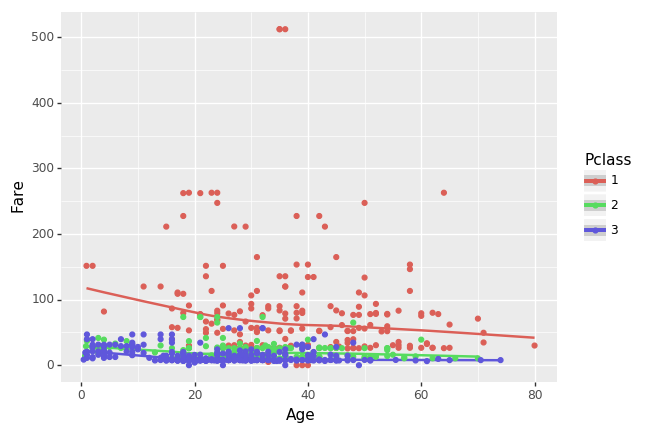

<ggplot: (164622787013)>

In [60]:
(
ggplot(train)
    +aes(x="Age", y="Fare", color="Pclass")
    +stat_smooth()
    +geom_point()
)

# bar chart

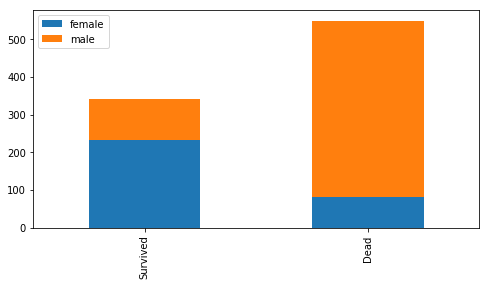

In [66]:
def bar_chart(f):
#     train[train["Survived"]==1][f]    # 생존한 사람의 성별이 나온다
    survived = train[train["Survived"]==1][f].value_counts()
    dead = train[train["Survived"]==0][f].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(8, 4))
    
bar_chart("Sex")    # 성별에 따른 생존자수를 막대그래프로

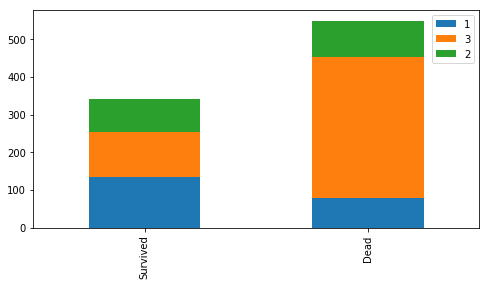

In [67]:
bar_chart("Pclass")

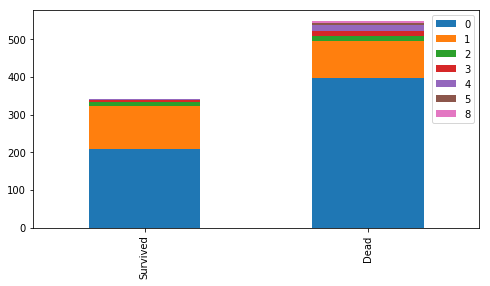

In [68]:
bar_chart("SibSp")

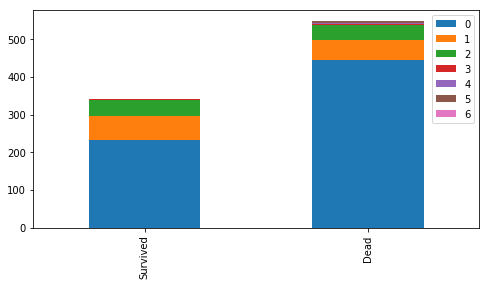

In [69]:
bar_chart("Parch")

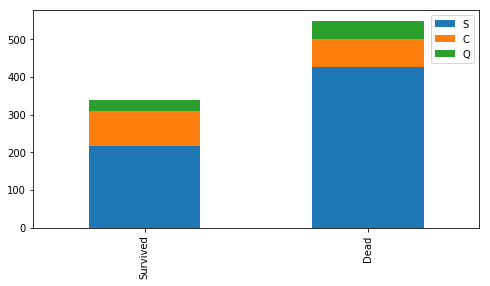

In [70]:
bar_chart("Embarked")

# boxplot

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


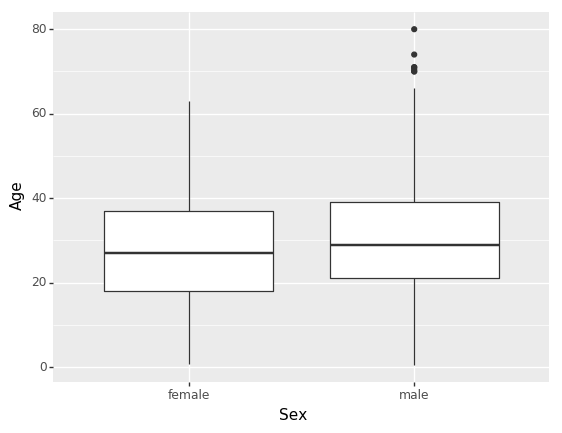

<ggplot: (-9223371872231988462)>

In [71]:
(
ggplot(train)
    +aes(x="Sex", y="Age")
    +geom_boxplot()
)

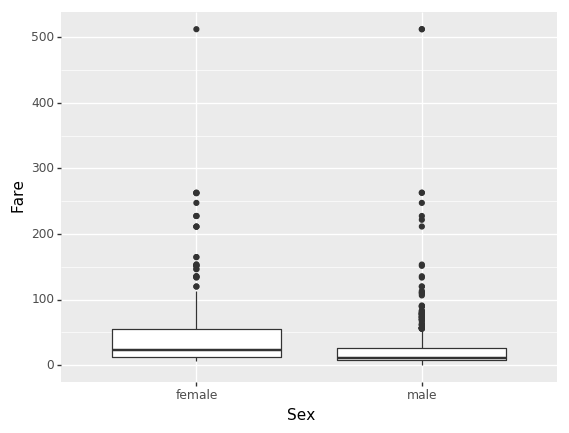

<ggplot: (-9223371872231933678)>

In [72]:
(
ggplot(train)
    +aes(x="Sex", y="Fare")
    +geom_boxplot()
)

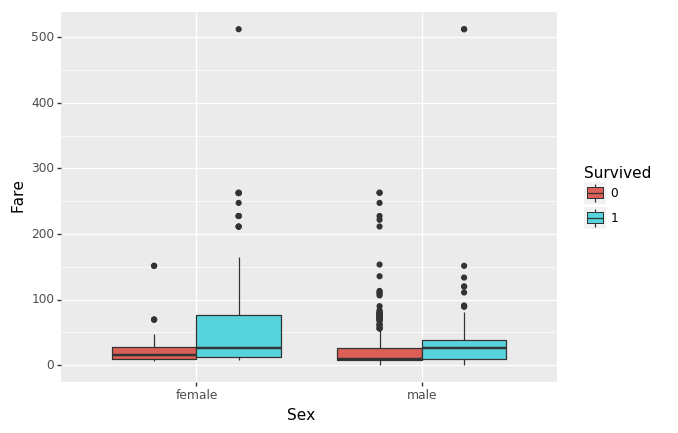

<ggplot: (164620777136)>

In [73]:
# 생존 여부에 따라 성별과 운임에 차이가 있는지 보고싶다

(
ggplot(train)
    +aes(x="Sex", y="Fare", fill="Survived")
    +geom_boxplot()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


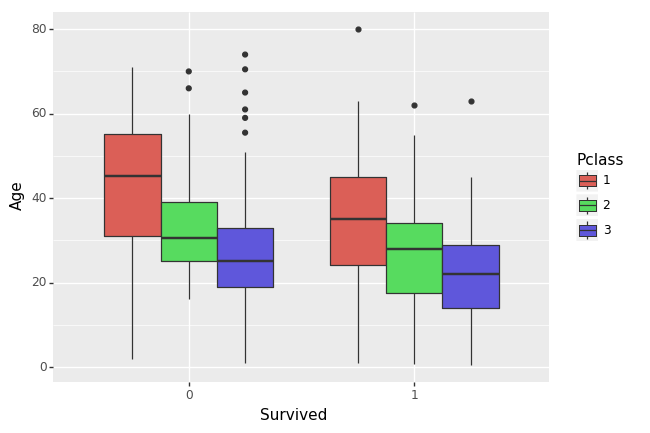

<ggplot: (-9223371872234100336)>

In [74]:
(
ggplot(train)
    +aes(x="Survived", y="Age", fill="Pclass")
    +geom_boxplot()
)

* warning이 뜨는 이유: 결측값 때문에 (결측값을 제거했다는 알림이 뜨는 것)

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 77.6+ KB


# warning 안나오게 결측값 처리 후 시각화

In [88]:
train["Age_median"] = train["Age"]
train["Age_mean"] = train["Age"]
train["Age_mode"] = train["Age"]

train["Age_median"] = train["Age_median"].fillna(train["Age_median"].median())
train["Age_mean"].fillna(train["Age_mean"].mean(), inplace=True)    # inplace=True하면 결과가 바로 저장됨
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     891 non-null float64
Age_mean       891 non-null float64
Age_mode       714 non-null float64
dtypes: category(1), float64(5), int64(3), object(6)
memory usage: 98.5+ KB


In [91]:
train["Age_mode"].fillna(train["Age_mode"].mode(), inplace=True)    # 변경이 안된다
# 왜냐하면
train["Age_mean"].mean()    # scalar로 나오는 얘랑 달리
train["Age_mode"].mode()    # 얘는 Series로 나오기 때문

0    24.0
dtype: float64

In [92]:
# 그러므로
train["Age_mode"].fillna(train["Age_mode"].mode()[0], inplace=True)    # 이렇게 값을 지정해줘야 한다
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     891 non-null float64
Age_mean       891 non-null float64
Age_mode       891 non-null float64
dtypes: category(1), float64(5), int64(3), object(6)
memory usage: 98.5+ KB


### 연령대별 분포

In [96]:
train["Age"].min()    # 0.42
train["Age"].max()    # 80.0

80.0

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_bin : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


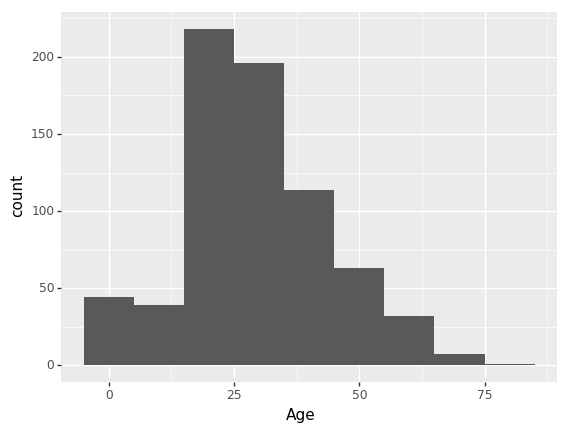

<ggplot: (164620678762)>

In [99]:
(
ggplot(train)
    +aes(x="Age")
    +geom_histogram(binwidth=10)
)

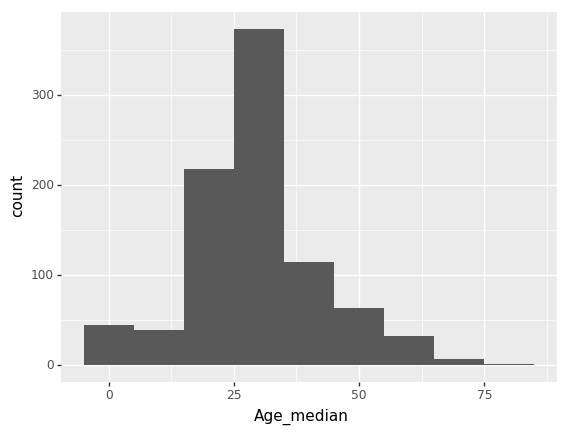

<ggplot: (164622432583)>

In [101]:
# 결측값을 중앙값으로 처리한 결과의 히스토그램
(
ggplot(train)
    +aes(x="Age_median")
    +geom_histogram(binwidth=10)
)

In [103]:
train_test_data = [train, test]
train_test_data

[     PassengerId Survived Pclass  \
 0              1        0      3   
 1              2        1      1   
 2              3        1      3   
 3              4        1      1   
 4              5        0      3   
 5              6        0      3   
 6              7        0      1   
 7              8        0      3   
 8              9        1      3   
 9             10        1      2   
 10            11        1      3   
 11            12        1      1   
 12            13        0      3   
 13            14        0      3   
 14            15        0      3   
 15            16        1      2   
 16            17        0      3   
 17            18        1      2   
 18            19        0      3   
 19            20        1      3   
 20            21        0      2   
 21            22        1      2   
 22            23        1      3   
 23            24        1      1   
 24            25        0      3   
 25            26        1      3   
 

In [104]:
for data in train_test_data:
    print(data["Name"])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil